In [2]:
import pickle

In [1]:
import pandas as pd
import numpy as np

#visualizations
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
plt.style.use('seaborn-poster')

sns.set_style('darkgrid')


#saving/loading data
import pickle

#Evaluating models
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, auc,roc_auc_score, roc_curve

#logistic regression
from sklearn.linear_model import LogisticRegression


The dataset was taken from [other project](https://github.com/YeonjooSmith/MachineLearning_CouponRedemptionAnalysis) 

In [4]:
datas = pickle.load(open("finals.p","rb"))
datas.keys()

dict_keys(['test_final', 'train_final', 'X_reduced', 'removed_cols', 'y', 'SMOTE_ratio', 'X_train_resampled', 'y_train_resampled', 'X_test', 'y_test', 'scaled_X_train_resampled', 'scaled_X_test', 'X_outlier', 'y_outlier', 'X'])

In [5]:
X_train = datas['scaled_X_train_resampled']
y_train = datas['y_train_resampled']
y_test = datas['y_test']
X_test = datas['scaled_X_test']

In [6]:
to_del =[]
for col in X_train.columns:
    if 'id' in col:
        to_del.append(col)

In [7]:
X_train.drop(to_del, axis = 1, inplace=True)
X_test.drop(to_del, axis = 1, inplace=True)

# `result` class

In [40]:
class result(object):
    """preds is a dictionary whose keys are 'train_preds' and 'test_preds' and the corresponding value is 
        the prediction for X_train and X_test
        
        params is a dictionary of parameters used in the model
    
    """
    def __init__(self,obj=None, params=None, preds={'train_preds':None, 'test_preds':None}):
        self.model_obj = obj
        self.params = params#parameter used, dictionary
        self.preds = preds#[train_preds, test_preds]
        self.data = None
        self.note = None
        self.metrics = None # to save the output of save_metrics
    def print_metrics(self):
        "Print evaluation scores for the train and the test sets"
        print('Train set\n')
        print("Precision Score: {}".format(precision_score(y_train, self.preds['train_preds'])))
        print("Recall Score: {}".format(recall_score(y_train, self.preds['train_preds'])))
        print("Accuracy Score: {}".format(accuracy_score(y_train, self.preds['train_preds'])))
        print("F1 Score: {}".format(f1_score(y_train, self.preds['train_preds'])))
        print('\n')
        
        print('Test set\n')
        print("Precision Score: {}".format(precision_score(y_test, self.preds['test_preds'])))
        print("Recall Score: {}".format(recall_score(y_test, self.preds['test_preds'])))
        print("Accuracy Score: {}".format(accuracy_score(y_test, self.preds['test_preds'])))
        print("F1 Score: {}".format(f1_score(y_test, self.preds['test_preds'])))
        print('\n')
        
    def save_metrics(self):
        """
            Save the evaluation scores as a dictionary.
        """
        scores ={}
        scores['Train set']={
            "Precision Score":precision_score(y_train, self.preds['train_preds']),
            "Recall Score":recall_score(y_train, self.preds['train_preds']),
            "Accuracy Score":accuracy_score(y_train, self.preds['train_preds']),
            "F1 Score":f1_score(y_train, self.preds['train_preds']),
        }

        scores['Test set']={
            "Precision Score":precision_score(y_test, self.preds['test_preds']),
            "Recall Score":recall_score(y_test, self.preds['test_preds']),
            "Accuracy Score":accuracy_score(y_test, self.preds['test_preds']),
            "F1 Score":f1_score(y_test, self.preds['test_preds']),
        }
        return scores

    def plot_confusion_matrix(self,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        """Plot confusion matrix"""
        cm = confusion_matrix(self.preds['test_preds'], y_test)
        classes =[0,1]
        # Check if normalize is set to True
        # If so, normalize the raw confusion matrix before visualizing


        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
            title ='Normalized'+ title
        else:
            print('Confusion matrix, without normalization')
            title = title
        print(cm)

        array = cm 

        df_cm = pd.DataFrame(array, index =classes,
                          columns = classes)
        plt.figure(figsize = (7,5))
#         akws = {"ha": 'left',"va": 'top'}
        akws = {"ha": 'left',"va": 'top',"size": 15}
        # Text formatting
        fmt = '.2f' if normalize else 'd'
        ax = sns.heatmap(df_cm, cmap= plt.cm.Blues,  annot=True, annot_kws=akws, fmt=fmt)
        ax.set_title(title) 
        ax.set_xlabel('True label') 
        ax.set_ylabel('Predicted label')

        plt.show() 
        return cm

In [49]:
def Saving_results(result_obj,#result objec 
                   md_obj,#model object such as LogisticRegression
                   result_name#The name of the model such as logistic regression to save it in train_scores/test_scores df
                  ):
    #for my convinience, I just used global variables, X_train, X_test, y_train, y_test, here.
    # I also define a dictionary called Result which is to save the results with result_name as the key
    md_obj.fit(X_train,y_train)#fit model
    train_preds = md_obj.predict(X_train)#y_train_prediction
    test_preds = md_obj.predict(X_test)#y_test_prediction
    
    result_obj.obj = md_obj
    result_obj.preds = {'train_preds':train_preds, 'test_preds':test_preds}#predictions grouped as a dictionary saved 
    result_obj.params = md_obj.__dict__#hyperparameters saved 
    result_obj.metrics = result_obj.save_metrics()#evaluation scores saved as a dictionary 
    
    
    
    result_obj.print_metrics() #print evaluation scores 
    result_obj.confMat = result_obj.plot_confusion_matrix()#confusion matrix
    
    #Save the result object in Results dictionary with key= result_name
    Results[result_name] = result_obj
    print('{} is saved in Results table.'.format(result_name))
    
    
    #evaluation scores saved in the dataframes
    train_scores.loc[result_name] = result_obj.metrics['Train set'] 
    test_scores.loc[result_name] = result_obj.metrics['Test set']
    
    #updating the dataframes of evalution scores
    Results['train_scores'] = train_scores
    Results['test_scores'] = test_scores
    print('train_scores dataframe is updated.\n')
    print(train_scores)
    print('\n')
    print('test_scores dataframe is updated.\n')
    print(test_scores)
    
    return None

Creating the `DataFrame`s

In [50]:
#Dataframes to save evaluating scores of different models
train_scores =pd.DataFrame(columns = ['Precision Score', 'Recall Score', 'Accuracy Score', 'F1 Score'])
test_scores =pd.DataFrame(columns = ['Precision Score', 'Recall Score', 'Accuracy Score', 'F1 Score'])

In [51]:
logreg = LogisticRegression(fit_intercept=False, C=0.001, solver='sag')

In [52]:
LogReg = result()
logreg = LogisticRegression(fit_intercept=False, C=0.001, solver='sag')

Train set

Precision Score: 0.6141933228456563
Recall Score: 0.9287904419539015
Accuracy Score: 0.8375786988457503
F1 Score: 0.7394204667410197


Test set

Precision Score: 0.029697766097240473
Recall Score: 0.6890243902439024
Accuracy Score: 0.8060018658650357
F1 Score: 0.05694129503653313


Confusion matrix, without normalization
[[15438    51]
 [ 3692   113]]


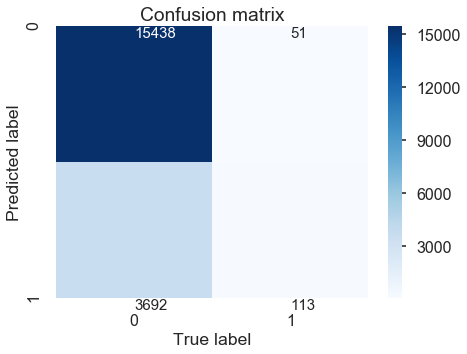

LogisticRegression is saved in Results table.
train_scores dataframe is updated.

                    Precision Score  Recall Score  Accuracy Score  F1 Score
LogisticRegression         0.614193       0.92879        0.837579   0.73942


test_scores dataframe is updated.

                    Precision Score  Recall Score  Accuracy Score  F1 Score
LogisticRegression         0.029698      0.689024        0.806002  0.056941


In [53]:
Saving_results(LogReg, logreg,'LogisticRegression' )

In [54]:
train_scores

,Precision Score,Recall Score,Accuracy Score,F1 Score
LogisticRegression,0.614193,0.92879,0.837579,0.73942


In [55]:
test_scores

,Precision Score,Recall Score,Accuracy Score,F1 Score
LogisticRegression,0.029698,0.689024,0.806002,0.056941
